### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

In [3]:
from math import pi
from numpy import *
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
from matplotlib import cm
from scipy.constants import *
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

## Prenesena informacija splošnega (asimetričnega) binarnega kanala v odvisnosti od porazdelitve vhodnih simbolov in verjetnosti napake

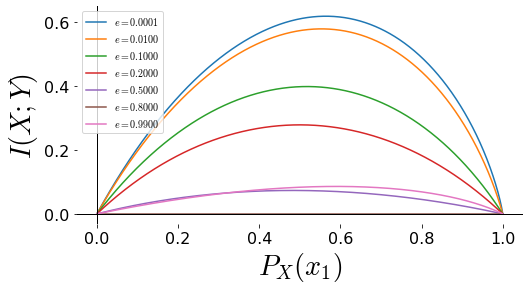

In [11]:
f=0.2 #napaka pri prenosu drugega simbola
e_list=array([0.0001,0.01,0.1,0.2,0.5,0.8,0.99])
a=linspace(0,1,1001)
I=empty((0,size(a)),float64)
for e in e_list:
    PI11=a*(1-e)*log2((1-e)/(a+f-a*e-a*f))
    PI12=(1-a)*f*log2(f/(a+f-a*e-a*f))
    PI21=a*e*log2(e/(1-a-f+a*e+a*f))
    PI22=(1-a)*(1-f)*log2((1-f)/(1-a-f+a*e+a*f))
    I=append(I,array([PI11+PI12+PI21+PI22]),axis=0)
    
#Risanje
fig, ax = plt.subplots(figsize=(8,4))
i=0
for e in e_list:
    ax.plot(a,I[i],label="$e={:.4f}$".format(e))
    i+=1

#ax.plot(a,I)

ax.legend()
ax.axvline(0, color='black', lw=1)
ax.axhline(0, color='black', lw=1)
plt.ylabel('$I(X;Y)$', fontsize=28)
plt.xlabel(r'$P_X(x_1)$', fontsize=28)
ax.set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

# Kapaciteta diskretnega informacijskega kanala

## Splošni binarni kanal (asimetrični)

<ipython-input-16-37a2d5f23d48>:5: RuntimeWarning: divide by zero encountered in true_divide
  PI11=a*(1-e)*log2((1-e)/(a+f-a*e-a*f))
<ipython-input-16-37a2d5f23d48>:6: RuntimeWarning: divide by zero encountered in true_divide
  PI12=(1-a)*f*log2(f/(a+f-a*e-a*f))
<ipython-input-16-37a2d5f23d48>:9: RuntimeWarning: invalid value encountered in add
  C=PI11+PI12+PI21+PI22


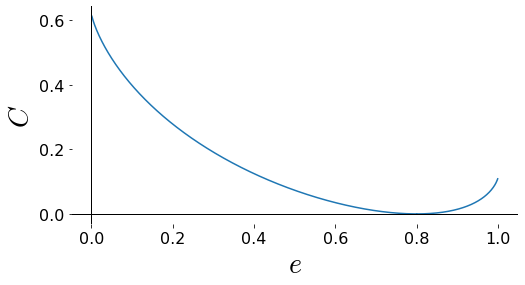

In [16]:
e=linspace(0+.001,1-.001,1001-2)   #napaka pri prenosu prvega simbola
f=0.2 #napaka pri prenosu drugega simbola
K=(((1-f)**(1-f)*f**f) / ((1-e)**(1-e)*e**e))**(1/(1-e-f))
a=(f*(K+1)-1) / ((K+1)*(-1+e+f))
PI11=a*(1-e)*log2((1-e)/(a+f-a*e-a*f))
PI12=(1-a)*f*log2(f/(a+f-a*e-a*f))
PI21=a*e*log2(e/(1-a-f+a*e+a*f))
PI22=(1-a)*(1-f)*log2((1-f)/(1-a-f+a*e+a*f))
C=PI11+PI12+PI21+PI22

#Risanje
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(e,C)
ax.axvline(0, color='black', lw=1)
ax.axhline(0, color='black', lw=1)
plt.ylabel('$C$', fontsize=28)
plt.xlabel(r'$e$', fontsize=28)
ax.set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

## Prenesena informacija binarnega kanala v odvisnosti od porazdelitve vhodnih simbolov in verjetnosti napake

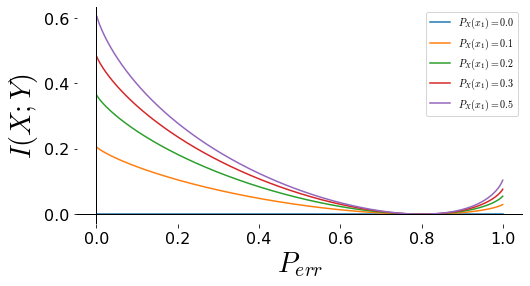

In [14]:
f=0.2 #napaka pri prenosu drugega simbola

a_list=array([0, 0.1, 0.2, 0.3, 0.5])
I=empty((0,size(e)),float64)
for a in a_list:
    PI11=a*(1-e)*log2((1-e)/(a+f-a*e-a*f))
    PI12=(1-a)*f*log2(f/(a+f-a*e-a*f))
    PI21=a*e*log2(e/(1-a-f+a*e+a*f))
    PI22=(1-a)*(1-f)*log2((1-f)/(1-a-f+a*e+a*f))
    I=append(I,array([PI11+PI12+PI21+PI22]),axis=0)
    
#Risanje
fig, ax = plt.subplots(figsize=(8,4))
i=0
for a in a_list:
    ax.plot(e,I[i],label="$P_X(x_1)={:.1f}$".format(a))
    i+=1

ax.legend()
ax.axvline(0, color='black', lw=1)
ax.axhline(0, color='black', lw=1)
plt.ylabel('$I(X;Y)$', fontsize=28)
plt.xlabel(r'$P_{err}$', fontsize=28)
ax.set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

In [20]:
#%matplotlib
f=0.0000001 #napaka pri prenosu drugega simbola
e=linspace(0+.01,1-.01,101-2)
a_list=linspace(0,1,101)
I=empty((0,size(e)),float64)
for a in a_list:
    PI11=a*(1-e)*log2((1-e)/(a+f-a*e-a*f))
    PI12=(1-a)*f*log2(f/(a+f-a*e-a*f))
    PI21=a*e*log2(e/(1-a-f+a*e+a*f))
    PI22=(1-a)*(1-f)*log2((1-f)/(1-a-f+a*e+a*f))
    I=append(I,array([PI11+PI12+PI21+PI22]),axis=0)
    
#Risanje
#fig, ax = plt.subplots(figsize=(8,4))
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
X,Y=meshgrid(a_list,e)
ax.plot_surface(X,Y,transpose(I), cmap=cm.jet, linewidth=0, antialiased=True, alpha=0.6)

ax.set_zlabel('$I(X;Y)$', fontsize=28)
plt.xlabel('$P_X(x_1)$', fontsize=28)
plt.ylabel(r'$P_{err}$', fontsize=28)
ax.set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 


Using matplotlib backend: Qt5Agg
